Calculating the mld depth using interpolation of the s-levels in the Norkyst dataset. This creates more continous depths and might make the mld calculations more accurate than using a transformation method from s_rho to z_rho. This notebook is to visualize the differences and compare these two methods of calculating the mld. I will use the xarray interpolation feature as recommended by a colleauge. Ill try using a linear method. If this interpolation lacks effiency, I might consider using xroms and sgrid instead, but I will try to stick with xarray.

In [38]:
from script_mld import dens
from script_mld import transformation
from script_mld import MLD
import xarray as xr
import matplotlib.pyplot as plt 
import numpy as np
from scipy.interpolate import interp1d
from scipy.interpolate import interp2d

In [64]:
#we try (30.03.2024)
#TODO sjekk at det blir riktig datasett å jobbe med - eller om de ønsker at jeg skal bruke operational
ds_2024 = xr.open_dataset(f'/lustre/storeB/project/fou/hi/foccus/datasets/symlinks/norkystv3-hindcast/2024/norkyst800-20240330.nc').isel(time = 0)
ds_2024.head() 

#first thing Victor does is to select out all variables and define variables + parameters and perform the vertical transformation
#Because I already have the transformation code, I will use that one

transformation(ds_2024)
z = ds_2024.z_rho

In [115]:
z

<xarray.DataArray 'z_rho' (s_rho: 40, X: 2747, Y: 1148)> Size: 1GB
array([[[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [-192.12333081, -192.08629577, -192.01893191, ...,
         -137.8629532 , -139.41269894, -140.22684758],
        [-192.19551293, -192.14912847, -192.06400226, ...,
         -134.46273268, -135.81615895, -136.51640733],
        [-192.20043684, -192.15014044, -192.05747733, ...,
         -132.64107428, -133.87078573, -134.49901642]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
...
           -1.46077985,   -1.46515363,   -1.46742996],
        [  -2.00569916,   -2.00560909,   -2.0054437 , ...,
           -1.45099178,   -1.45491988,   -1.4569355 ],
        [  -2.00570873,   -2.00561105,   -2.00543102, ...,
           -1.44563628,   -1.4492602 ,   -1.45109765]],

       [[          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        [          nan,           nan,           nan, ...,
                   nan,           nan,           nan],
        ...,
        [  -1.30441983,   -1.30439792,   -1.30435806, ...,
           -0.84605337,   -0.8474104 ,   -0.84811639],
        [  -1.30446251,   -1.30443509,   -1.30438473, ...,
           -0.84301403,   -0.84423416,   -0.84486004],
        [  -1.30446542,   -1.30443569,   -1.30438087, ...,
           -0.84134966,   -0.842476  ,   -0.84304692]]],
      shape=(40, 2747, 1148))
Coordinates:
    time     datetime64[ns] 8B 2024-03-30
  * s_rho    (s_rho) float64 320B -0.9799 -0.9403 -0.9014 ... -0.01529 -0.004904
  * X        (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y        (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.16e+05 9.168e+05 9.176e+05
    lon      (X, Y) float64 25MB 8.7 8.69 8.679 8.669 ... 18.4 18.38 18.35 18.33
    lat      (X, Y) float64 25MB 54.29 54.3 54.3 54.3 ... 75.72 75.72 75.73
    z_rho    (s_rho, X, Y) float64 1GB nan nan nan ... -0.8413 -0.8425 -0.843

In [120]:
#hente ut temp også
temp = ds_2024.temperature
salinity = ds_2024.salinity
#og hente ut dimensjoner, så først sjekke datsettet og dimensjonene 
ds_2024

<xarray.Dataset> Size: 4GB
Dimensions:           (Y: 1148, X: 2747, s_rho: 40, s_w: 41)
Coordinates:
    time              datetime64[ns] 8B 2024-03-30
  * s_rho             (s_rho) float64 320B -0.9799 -0.9403 ... -0.004904
  * X                 (X) float64 22kB 0.0 800.0 1.6e+03 ... 2.196e+06 2.197e+06
  * Y                 (Y) float64 9kB 0.0 800.0 1.6e+03 ... 9.168e+05 9.176e+05
  * s_w               (s_w) float64 328B -1.0 -0.96 -0.9208 ... -0.01 0.0
    lon               (X, Y) float64 25MB 8.7 8.69 8.679 ... 18.38 18.35 18.33
    lat               (X, Y) float64 25MB 54.29 54.3 54.3 ... 75.72 75.72 75.73
    z_rho             (s_rho, X, Y) float64 1GB nan nan nan ... -0.8425 -0.843
Data variables: (12/18)
    Uwind_eastward    (Y, X) float32 13MB ...
    Vwind_northward   (Y, X) float32 13MB ...
    zeta              (Y, X) float32 13MB ...
    ubar_eastward     (Y, X) float32 13MB ...
    vbar_northward    (Y, X) float32 13MB ...
    u_eastward        (s_rho, Y, X) float32 505MB ...
    ...                ...
    hc                float64 8B ...
    Cs_r              (s_rho) float64 320B ...
    Cs_w              (s_w) float64 328B ...
    h                 (Y, X) float32 13MB ...
    projection_stere  int32 4B ...
    depth             int32 4B ...
Attributes: (12/33)
    id:                      15f95603-12d1-4e0f-8cbe-33946594447f
    naming_authority:        no.met
    operational_status:      scientific
    iso_topic_category:      oceans
    activity_type:           Numerical Simulation
    keywords_vocabulary:     GCMDSK:GCMD Science Keywords:https://gcmd.earthd...
    ...                      ...
    project:                 Norkyst_v3
    license:                 https://spdx.org/licenses/CC-BY-4.0 (CC-BY-4.0)
    title:                   Norkyst-800m - ROMS, Norkyst-800m ocean hindcast...
    summary:                 Norkyst-800m (Norwegian Coast 800m horizontal re...
    title_no:                Hindcast prognoser fra havmodellen Norkyst-800m,...
    summary_no:              NorKyst-800m (Norske kystområder med 800m horiso...

In [101]:
#dims
Nx = temp.shape[2]
Ny = temp.shape[1]
Nt = temp.shape[0]
Nz = ds_2024.s_w.shape[0]

#new depth to interpolate to 
new_depth = np.linspace(z.min().item(), z.max().item(), 200)
new_depth[-1] = z.max().item()

In [102]:
#try Victors code
#just testing some things to make sure I understand the logistics of the code:

In [103]:
array = np.array([3,np.nan])

In [104]:
mask = np.isfinite(array)

In [105]:
print(mask)
new_depth = np.linspace(0, 2000, 200)

[ True False]


In [106]:
if mask.sum() < 2:
    test = np.full_like(new_depth, np.nan)
    print(f'The sum is less than two, the sum is: {mask.sum()}')
    print(f'New depth now consists of: {test}')
else:
    print(mask.sum())


The sum is less than two, the sum is: 1
New depth now consists of: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]


In [107]:
#Okay so he interpolates as long as the existing depth array consists of minimum two finite points
#this is because two real points is necessary to be able to perform the interpolation
#I understand the code for a single point, will adapt the one for the whole grid:

In [108]:
import time

In [146]:
start = time.time()
def interpolate_grid(depth_transf, Temp, nz = 50, eta_chunck = 40):

    #create grid sizes
    eta_size = depth_transf.sizes['Y']
    xi_size = depth_transf.sizes['X']

    #initialize array
    out_array = np.full((2, nz, eta_size, xi_size), np.nan) #np.full(shape, fill_val)
    
    #Horizontal slice
    for i_start in range(0,eta_size, eta_chunck):
        i_end = min(i_start+eta_chunck, eta_size)

        depth_slice = depth_transf[:, i_start:i_end, :].values
        temp_slice = Temp[:, i_start:i_end, :].values

        #vectorized interpolation

        for ii in range(depth_slice.shape[1]):  # eta in chunk
            for jj in range(depth_slice.shape[2]):  # xi
                dcol = depth_slice[:, ii, jj]
                tcol = temp_slice[:, ii, jj]
                
                mask = np.isfinite(dcol) & np.isfinite(tcol)
                if mask.sum() < 2:
                    continue
                
                d = dcol[mask]
                t = tcol[mask]
                
                # Sort and remove duplicates
                sort_idx = np.argsort(d)
                d, t = d[sort_idx], t[sort_idx]
                keep = np.ones(len(d), bool)
                for k in range(1, len(d)):
                    if d[k] == d[k-1]:
                        keep[k] = False
                d, t = d[keep], t[keep]
                
                # Column-specific new depth
                new_depth_col = np.linspace(d.min(), d.max(), nz)
                
                # Vectorized interpolation
                out_array[0, :, i_start+ii, jj] = np.interp(new_depth_col, d, t)
                out_array[1, :, i_start+ii, jj] = new_depth_col
    
    da = xr.DataArray(out_array,
                      dims=("var", "new_depth", "eta_rho", "xi_rho"),
                      coords={"var": ["temperature", "depth"]})
    
    return da

end = time.time()
print(f'Time elapsed is: {end - start:.2f} seconds')

Time elapsed is: 0.00 seconds


In [147]:
depth_transp = z.transpose(*temp.dims)

In [148]:
temp_da = interpolate_grid(depth_transp, temp, nz = 50)

In [149]:
temp_da

<xarray.DataArray (var: 2, new_depth: 50, eta_rho: 1148, xi_rho: 2747)> Size: 3GB
array([[[[          nan,           nan,           nan, ...,
             2.08699942,    2.0449996 ,    2.04299974],
         [          nan,           nan,           nan, ...,
             2.1069994 ,    2.05699968,    2.03999949],
         [          nan,           nan,           nan, ...,
             2.13099957,    2.0909996 ,    2.06299973],
         ...,
         [          nan,           nan,           nan, ...,
             2.62999964,    2.65199947,    2.68799973],
         [          nan,           nan,           nan, ...,
             2.6619997 ,    2.68299961,    2.71699953],
         [          nan,           nan,           nan, ...,
             2.71099949,    2.72899961,    2.72299957]],

        [[          nan,           nan,           nan, ...,
             2.08699942,    2.01851513,    2.02909541],
         [          nan,           nan,           nan, ...,
             2.1069994 ,    2.05368913,    2.03867539],
         [          nan,           nan,           nan, ...,
             2.13099957,    2.0909996 ,    2.06366174],
...
            -3.64231663,   -3.56994706,   -3.53113996],
         [          nan,           nan,           nan, ...,
            -3.67527343,   -3.59876324,   -3.55733946],
         [          nan,           nan,           nan, ...,
            -3.69258029,   -3.61366713,   -3.57071976]],

        [[          nan,           nan,           nan, ...,
            -1.30441983,   -1.30446251,   -1.30446542],
         [          nan,           nan,           nan, ...,
            -1.30439792,   -1.30443509,   -1.30443569],
         [          nan,           nan,           nan, ...,
            -1.30435806,   -1.30438473,   -1.30438087],
         ...,
         [          nan,           nan,           nan, ...,
            -0.84605337,   -0.84301403,   -0.84134966],
         [          nan,           nan,           nan, ...,
            -0.8474104 ,   -0.84423416,   -0.842476  ],
         [          nan,           nan,           nan, ...,
            -0.84811639,   -0.84486004,   -0.84304692]]]],
      shape=(2, 50, 1148, 2747))
Coordinates:
  * var      (var) <U11 88B 'temperature' 'depth'
Dimensions without coordinates: new_depth, eta_rho, xi_rho

In [150]:
temp_da.new_depth


<xarray.DataArray 'new_depth' (new_depth: 50)> Size: 400B
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])
Dimensions without coordinates: new_depth

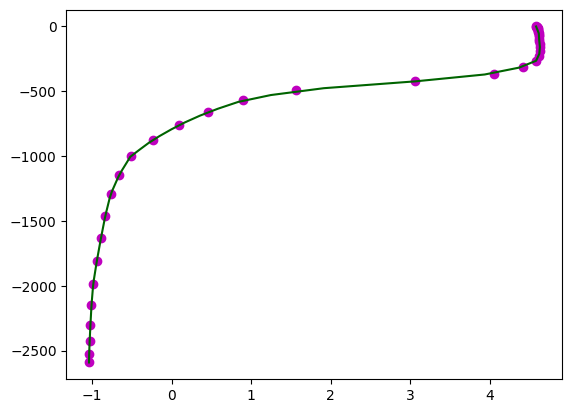

In [151]:
#selecting out one point
X, Y = 1147,2111
depth_orig = z[:,Y,X]
temp_orig = temp[:,X,Y]

plt.scatter(temp_orig, depth_orig, color = 'm', label = 'Original')
plt.plot(temp_da[0,:,X,Y].values, temp_da[1, :, X,Y], label = 'Interpolated', color = 'darkgreen', zorder = 20)


In [152]:
#it works yiha - thx Vicor
temp_region = ds_2024.temperature.sel(X = 1447, Y = 2111, method='nearest')
salinity_region = ds_2024.salinity.sel(X = 1147, Y = 2111, method = 'nearest')

In [153]:
pot_dens = dens(temp_region, salinity_region)

In [156]:
#Throwing an error because of shape inconstitencies 
temp_da[1,:,X,Y].shape
#pot_dens.shape

(50,)

In [155]:
MLD(pot_dens.values, temp_da[1,:, X,Y].values)

IndexError: boolean index did not match indexed array along axis 0; size of axis is 50 but size of corresponding boolean axis is 40